<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/T2_Control_Chart_w_samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This code demonstrates how you can plot T2 Control Chart with samples.
# Note that this code should work for the Phase I & II of control charting when the T2 chart function is called.
# The example data set has m=25, p=3, n=10 from multivariate normal distribution.
Ref. Montgomery Intro to SQC 8 ed pp 465 chap 11 estimating mu and sigma
code. Code. https://github.com/carlosqsilva/pyspc
Create and Revise by Shing Chang 4/7/2022

In [ ]:
# Import required libraries
from scipy.stats import beta
from scipy.stats import f
from scipy.stats import multivariate_normal
import numpy as np
import statistics
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import pandas as pd
plt.style.use('seaborn-colorblind')

In [ ]:
# to create multivariate variates given mean vector and covariance matrix
mean = np.array([39,62, 20])
cov = np.array([[4.0, 0.3, 1.5], [0.3, 6.0,1.0], [1.5,1.0,2.0]])
x1 = multivariate_normal.rvs(mean, cov, 10)
x2 = multivariate_normal.rvs(mean, cov, 10)
# plt.scatter(x[:,0],x[:,1])
# plt.show()

In [ ]:
# sample 1 is based on 10 obsevations
x1

array([[38.12854132, 59.82885394, 19.25954052],
       [41.82369613, 60.51619186, 20.81317478],
       [36.52556323, 62.2305107 , 21.22709469],
       [39.37179017, 64.87391132, 19.49943054],
       [37.59249019, 64.61338842, 18.0518768 ],
       [39.03330946, 64.33206992, 21.76353756],
       [40.05461685, 61.344061  , 19.2426409 ],
       [38.84532731, 60.85159496, 19.09975058],
       [38.39305909, 64.57390556, 20.21870841],
       [37.9637057 , 63.44028383, 18.08427435]])

In [ ]:
# sample 2 is based on 10 obsevations
x2

array([[39.58298983, 60.11355483, 18.56101437],
       [39.11565152, 66.13168865, 20.37326884],
       [37.93949895, 60.07418563, 19.49553443],
       [38.14883924, 64.32321662, 18.27388702],
       [40.79634352, 62.92185765, 23.53032685],
       [42.03008226, 60.57688653, 21.78323313],
       [39.39184451, 63.86880922, 20.44027908],
       [42.12981923, 59.55515859, 20.67228456],
       [35.47391427, 55.85941258, 18.943271  ],
       [40.11754494, 64.69365358, 21.51535607]])

In [ ]:
# how column average can be computed; axis = 0 means row-wise operation
x1.mean(axis=0)

array([38.77320995, 62.66047715, 19.72600291])

In [ ]:
# demonstration of how mean vectors can be computed through samples
# avarage of the samples
(x1+x2)/2

array([[38.85576558, 59.97120439, 18.91027745],
       [40.46967382, 63.32394026, 20.59322181],
       [37.23253109, 61.15234817, 20.36131456],
       [38.76031471, 64.59856397, 18.88665878],
       [39.19441685, 63.76762304, 20.79110183],
       [40.53169586, 62.45447822, 21.77338535],
       [39.72323068, 62.60643511, 19.84145999],
       [40.48757327, 60.20337678, 19.88601757],
       [36.93348668, 60.21665907, 19.5809897 ],
       [39.04062532, 64.0669687 , 19.79981521]])

In [ ]:
#there are two ways to compute the X bar bar: method 1
x_avg=(x1+x2)/2
x_avg.mean(axis=0)

array([39.12293139, 62.23615977, 20.04242422])

In [ ]:
#there are two ways to compute the X bar bar: method 2
(x1.mean(axis=0) + x2.mean(axis=0))/2

array([39.12293139, 62.23615977, 20.04242422])

In [ ]:
# compute the covariance matrix for one sample
matcov1 = np.cov(x1.T)
matcov1

array([[ 2.11556054, -0.83014985,  0.34348255],
       [-0.83014985,  3.73140102, -0.06545851],
       [ 0.34348255, -0.06545851,  1.58024992]])

In [ ]:
matcov2 = np.cov(x2.T)
matcov2

array([[4.00090321, 1.71322189, 2.10595732],
       [1.71322189, 9.63210493, 1.37333681],
       [2.10595732, 1.37333681, 2.6509089 ]])

In [ ]:
# the T2 chart covariance matrix is based on the average of individual cov matrices
(matcov1 + matcov2)/2

array([[3.05823188, 0.44153602, 1.22471994],
       [0.44153602, 6.68175298, 0.65393915],
       [1.22471994, 0.65393915, 2.11557941]])

# Your Turn: use m=25 samples of n=10 to estimate the mean vector and covariance matrix

In [ ]:
# to create multivariate variates given mean vector and covariance matrix
# X is a collection of m (nxp) samples
mean = np.array([39,62, 20])
cov = np.array([[4.0, 0.3, 1.5], [0.3, 6.0,1.0], [1.5,1.0,2.0]])
m=25
n=10

X=[]
# each sample (i.e. x_data) is a multivariate normal data w dim(n,p) according to mean and cov
# create m samples using the append method to put them in x_data
for i in range(0, m):
        x_data = multivariate_normal.rvs(mean, cov, n)
        X.append(x_data)

# the following commented codes were used for debugging and validating the results
#x2 = multivariate_normal.rvs(mean, cov, 10)
#X=[x1,x2]
#X

In [ ]:
# compute the column means for each sample in X and store them in X_bars
# also comput the covaraince for each sample in X and store them in S
x_bars=[]
S=[]
for sample in X:
    x_bars.append(sample.mean(axis=0))
    S.append(np.cov(sample.T))
#print(x_bars)
#print(S)

In [ ]:
# compute the sample mean vector called x_bar2 or x double bars (there should be p double bars)
# note that x_bartemp is a temp varialbe to collect sums while x_bar2 is the avarage of all x-bars
# also compute the avarage of covariance matrices for each sample
# all computations are based on m samples
p=len(mean)
x_bartemp=np.zeros(p)
S_bars= np.zeros(shape=(p, p))
for xbar in x_bars:
    x_bartemp+=xbar
for S_sample in S:
    S_bars+=S_sample
x_bar2=x_bartemp/m
S_bars=S_bars/m
print("x bar bar is", x_bar2)
print("S bar is")
print(S_bars)

x bar bar is [39.03993458 62.0504723  20.10810693]
S bar is
[[3.94622062 0.12233913 1.46688879]
 [0.12233913 5.62246329 1.01969545]
 [1.46688879 1.01969545 1.87210142]]


In [ ]:
# example the first x_bar vector
x_bars[0]

array([39.90525403, 61.57204495, 20.54900457])

In [ ]:
#compute the first T2 value
# use this cell to validat the T2 statistic is correct
Smat = S_bars
Smat_inv = np.linalg.inv(Smat)
a = x_bars[0] - x_bar2
T2=10*a @ Smat_inv @ a.T
T2

2.7213075005959406

In [ ]:
class T2charting:

    _title="T-square Hotelling Chart with Samples"

    def fit(self, data, x_barbar, cov_mat, phase):
    # phase = 1 or 2
    # input data is all samples    
        X=data
       
        m = len(data)
        n = len(data[1])
        p = len(data[1].T)
        self.numsample=m
        self.N=n
        self.P=p

    # Generate the m x bar vectors with p variates
        x_bars=[]
        for sample in X:
            x_bars.append(sample.mean(axis=0))    

    # generate the covariance inverse
        Smat = cov_mat
        Smat_inv = np.linalg.inv(Smat)

    # generate the Hotelling T2 values
        self.T2values = []
        for i in range(m):
            a = x_bars[i] - x_barbar
            self.T2values.append(n * a @ Smat_inv @ a.T)

    # Phase I ucl p1 uses (m-1) but for phase II uses (m+1)
        if phase == 1:
          p1 = (p * (m - 1) * (n - 1))
        else:
          p1 = (p * (m + 1) * (n - 1))
        p2 = (m * n - m - p + 1)
        self.lcl = (p1 / p2) * f.ppf(0.00135, p, p2)
        self.center = (p1 / p2) * f.ppf(0.50, p, p2)
        self.ucl = (p1 / p2) * f.ppf(0.99865, p, p2)

        #return (self.T2values, self._title)

    def ControlChart(self):
        ucl = np.zeros(self.numsample)
        lcl = np.zeros(self.numsample)
              
        for i in range(self.numsample):
            lcl[i] = self.lcl
            ucl[i] = self.ucl
              
        plt.figure(figsize=(15,5))
        plt.plot(self.T2values,marker="o",color="k",label="T2")
        plt.plot([self.center]*self.numsample,color="k",alpha=0.35)
        plt.plot(ucl,color="r",label="UCL {}".format(ucl[len(ucl)-1].round(2)))
        plt.plot(lcl,color="r",label="LCL {}".format(lcl[len(lcl)-1].round(2)))
        plt.title("T2 Conrol Chart with (nxp) Samples")
        print("The sample size n=", self.N, " and number of variates p=", self.P)
        plt.legend(loc="upper left")
        plt.show()

The sample size n= 10  and number of variates p= 3


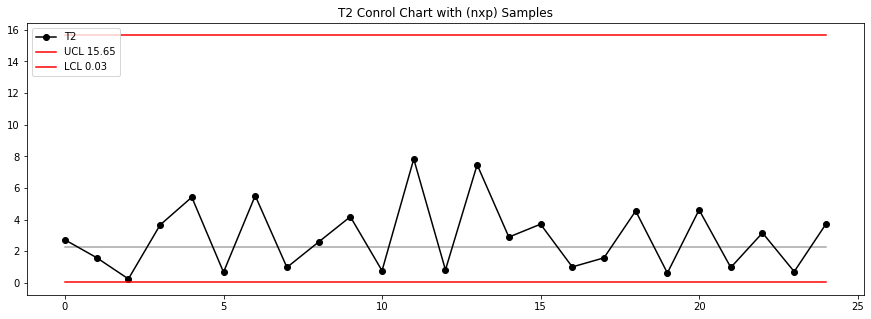

In [ ]:
# This chart is for Phase I or Phase II assuming all mean and sigma are estimated
# set phase =1 for using the ucl formula for Phase I T2 charting
chart = T2charting()
chart.fit(data=X, x_barbar=x_bar2, cov_mat=S_bars, phase=1)
chart.ControlChart()

# **Now we will use the mean and sigma estimated from the Phase I process above and plot all data**

In [ ]:
# to create multivariate variates given mean vector and covariance matrix
# Note that there is mean shift at the first variate from 39 to 41
mean = np.array([41,62, 20])
cov = np.array([[4.0, 0.3, 1.5], [0.3, 6.0,1.0], [1.5,1.0,2.0]])
m=20
n=10

X2=[]
#each x_data is a multivariate normal data set according to mean and cov
for i in range(0, m):
        x_data = multivariate_normal.rvs(mean, cov, n)
        X2.append(x_data)

# the following commented codes were used for debugging and validating the results
#x2 = multivariate_normal.rvs(mean, cov, 10)
#X=[x1,x2]
#X

The sample size n= 10  and number of variates p= 3


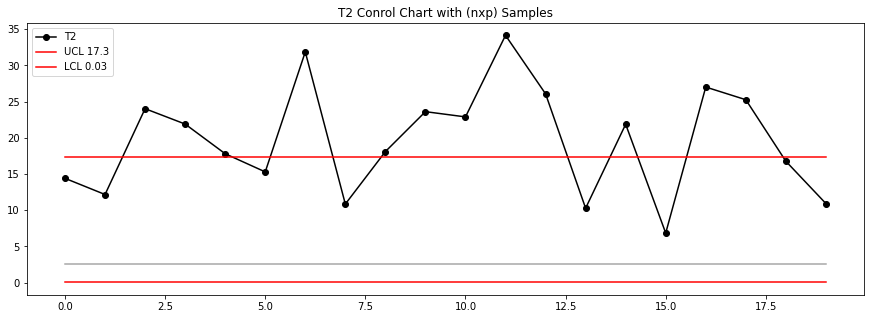

In [ ]:
# This chart is for Phase I or Phase II assuming all mean and sigma are estimated
# In this block, only Phase II data is plotted but mean vector and covariance estimates were from Phase I data
chart = T2charting()
chart.fit(data=X2, x_barbar=x_bar2, cov_mat=S_bars, phase=2)
chart.ControlChart()

Your turn: try different mean shift magnitudes in variaous variates

Ref. Pyspc: Other charts such as Xbar/S, Xbar/R are possible; e.g. c=spc(x1) + xbar_rbar()
Ref. https://github.com/carlosqsilva/pyspc